In [44]:
import pandas as pd
import numpy as np
import json, re, string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [29]:
df = pd.read_csv("../assets/berita.csv")
df.head()

,Unnamed: 0,judul
0,0,Luhut Pandjaitan Larang Pejabat ke Luar Negeri...
1,1,"Indonesia Waspadai Omicron, Luhut Pandjaitan L..."
2,2,WHO Konfirmasi Varian Covid-19 Omicron di 23 N...
3,3,Kemenkes Minta Masyarakat Waspada dengan Covid...
4,4,Ahli Epidemiologi Ungkap Kunci Cegah Penularan...


In [30]:
def caseFolding(data):
    data = data.lower()
    data = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",data).split())
    data = re.sub(r"\d+", "", data)
    data = data.translate(str.maketrans("", "", string.punctuation))
    data = re.sub(r"\n|\t", "", data)
    return data

def stopwordsCleaner(data):
    sw_indonesia = stopwords.words('indonesian')
    data = data = word_tokenize(data)
    data = [word for word in data if word not in sw_indonesia]
    data = " ".join(data)
    return data

In [31]:
df["n_judul"] = df["judul"].apply(caseFolding)
df["n_judul"] = df["n_judul"].apply(stopwordsCleaner)
df.head()


,Unnamed: 0,judul,n_judul
0,0,Luhut Pandjaitan Larang Pejabat ke Luar Negeri...,luhut pandjaitan larang pejabat negeri cegah o...
1,1,"Indonesia Waspadai Omicron, Luhut Pandjaitan L...",indonesia waspadai omicron luhut pandjaitan la...
2,2,WHO Konfirmasi Varian Covid-19 Omicron di 23 N...,who konfirmasi varian covid omicron negara daf...
3,3,Kemenkes Minta Masyarakat Waspada dengan Covid...,kemenkes masyarakat waspada covid varian omicron
4,4,Ahli Epidemiologi Ungkap Kunci Cegah Penularan...,ahli epidemiologi kunci cegah penularan covid ...


In [32]:
data_berita = [berita.split() for berita in df["n_judul"]]
data_berita

[['luhut',
  'pandjaitan',
  'larang',
  'pejabat',
  'negeri',
  'cegah',
  'omicron',
  'kesalahan',
  'menteri',
  'diungkap'],
 ['indonesia',
  'waspadai',
  'omicron',
  'luhut',
  'pandjaitan',
  'larang',
  'pejabat',
  'negara',
  'lakukan',
  'perjalanan',
  'negeri'],
 ['who',
  'konfirmasi',
  'varian',
  'covid',
  'omicron',
  'negara',
  'daftar',
  'lengkapnya'],
 ['kemenkes', 'masyarakat', 'waspada', 'covid', 'varian', 'omicron'],
 ['ahli',
  'epidemiologi',
  'kunci',
  'cegah',
  'penularan',
  'covid',
  'varian',
  'omicron'],
 ['mencegah', 'penularan', 'covid', 'varian', 'omicron', 'diwaspadai'],
 ['cek',
  'fakta',
  'varian',
  'covid',
  'omicron',
  'juli',
  'simak',
  'kebenarannya'],
 ['dirasakan',
  'pasien',
  'covid',
  'omicron',
  'dokter',
  'afrika',
  'selatan',
  'mengungkapnya'],
 ['covid',
  'varian',
  'omicron',
  'merebak',
  'balita',
  'afrika',
  'selatan',
  'sumbang',
  'persen',
  'rawat',
  'inap',
  'rumah',
  'sakit'],
 ['ilmuwan',
  '

## Text Modeling

In [35]:
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
import tqdm

In [36]:
dictionary = corpora.Dictionary(data_berita)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data_berita]

In [37]:
model = LdaModel(
    random_state=100,
    chunksize=100,
    per_word_topics=True,
    corpus = doc_term_matrix, 
    num_topics=5, 
    id2word = dictionary, 
    passes=50
)

In [39]:
print(model.print_topics())

[(0, '0.086*"omicron" + 0.067*"varian" + 0.056*"negara" + 0.042*"covid" + 0.023*"who" + 0.019*"cegah" + 0.016*"larang" + 0.016*"indonesia" + 0.015*"afrika" + 0.014*"wna"'), (1, '0.025*"omicron" + 0.014*"gejala" + 0.014*"langkah" + 0.014*"tegaskan" + 0.014*"ilmuwan" + 0.014*"hadapi" + 0.014*"dokter" + 0.014*"penciuman" + 0.014*"dibeberkan" + 0.014*"menemukannya"'), (2, '0.076*"omicron" + 0.065*"varian" + 0.043*"covid" + 0.018*"cegah" + 0.018*"masuk" + 0.018*"buruk" + 0.018*"negara" + 0.012*"picu" + 0.012*"cepat" + 0.012*"indonesia"'), (3, '0.054*"omicron" + 0.045*"varian" + 0.031*"covid" + 0.031*"virus" + 0.021*"who" + 0.021*"corona" + 0.012*"waspada" + 0.012*"asia" + 0.012*"penularan" + 0.012*"cepat"'), (4, '0.090*"omicron" + 0.070*"varian" + 0.050*"covid" + 0.040*"selatan" + 0.039*"afrika" + 0.021*"dunia" + 0.014*"dokter" + 0.013*"perjalanan" + 0.013*"vaksin" + 0.012*"cegah"')]


In [41]:
coherence_model = CoherenceModel(
    model=model, 
    texts=data_berita, 
    dictionary=dictionary, 
    coherence="c_v"
)
coherence_lda = coherence_model.get_coherence()
print(coherence_lda)

0.36441616679187766


## Find the best model

In [50]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    model = gensim.models.LdaMulticore(
        corpus = doc_term_matrix, 
        id2word=dictionary, 
        num_topics = k, 
        random_state=100, 
        chunksize=100, 
        passes=10, 
        alpha=a, 
        eta=b
    )
    coherence_model_lda = CoherenceModel(
        model=model, 
        texts=data_berita, 
        dictionary=dictionary, 
        coherence="c_v"
    )

    return coherence_model_lda.get_coherence()

In [51]:
min_topic=2
max_topic=11
step_size=1
topics = range(min_topic, max_topic, step_size)

alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

num_of_docs = len(doc_term_matrix)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(doc_term_matrix, num_of_docs*0.75), 
               doc_term_matrix]

corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }


In [52]:
pbar = tqdm.tqdm(total=540)
    
# iterate through validation corpuses
for i in range(len(corpus_sets)):
    # iterate through number of topics
    for k in topics:
        # iterate through alpha values
        for a in alpha:
            # iterare through beta values
            for b in beta:
                # get the coherence score for the given parameters
                cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                              k=k, a=a, b=b)
                # Save the model results
                model_results['Validation_Set'].append(corpus_title[i])
                model_results['Topics'].append(k)
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(cv)
                
                pbar.update(1)

pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
pbar.close()
 

100%|██████████| 540/540 [27:19<00:00,  3.04s/it]


Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:xlabel='Topics'>

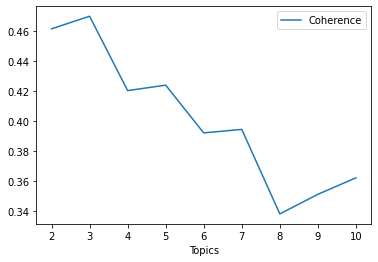

In [54]:
df_tuning_result = pd.read_csv("lda_tuning_results.csv")
df_plot = df_tuning_result[(df_tuning_result.Alpha == "0.01") & (df_tuning_result.Beta == "0.31") & (df_tuning_result.Validation_Set == "100% Corpus")].copy()
df_plot.plot(x='Topics', y = "Coherence", kind="line")

In [55]:
df_plot_2 = df_tuning_result[(df_tuning_result.Topics == 3) & (df_tuning_result.Validation_Set == "100% Corpus")].copy()
df_plot_2.sort_values(by="Coherence", ascending=False)

,Validation_Set,Topics,Alpha,Beta,Coherence
319,100% Corpus,3,0.9099999999999999,symmetric,0.483354
316,100% Corpus,3,0.9099999999999999,0.31,0.483354
318,100% Corpus,3,0.9099999999999999,0.9099999999999999,0.475932
314,100% Corpus,3,0.61,symmetric,0.475045
301,100% Corpus,3,0.01,0.31,0.470188
311,100% Corpus,3,0.61,0.31,0.469535
313,100% Corpus,3,0.61,0.9099999999999999,0.462772
312,100% Corpus,3,0.61,0.61,0.461958
317,100% Corpus,3,0.9099999999999999,0.61,0.459135
320,100% Corpus,3,symmetric,0.01,0.455967


In [56]:

lda_model = gensim.models.LdaMulticore(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=3, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.9,
                                           eta=0.9)
 
print(lda_model.print_topics())

[(0, '0.067*"omicron" + 0.051*"varian" + 0.034*"covid" + 0.027*"negara" + 0.026*"afrika" + 0.024*"selatan" + 0.017*"cegah" + 0.014*"indonesia" + 0.011*"perjalanan" + 0.011*"larang"'), (1, '0.024*"omicron" + 0.010*"varian" + 0.009*"waspada" + 0.007*"langkah" + 0.007*"orang" + 0.007*"who" + 0.006*"berkaitan" + 0.006*"covid" + 0.006*"larangan" + 0.006*"asia"'), (2, '0.053*"omicron" + 0.052*"varian" + 0.037*"covid" + 0.012*"vaksin" + 0.011*"dunia" + 0.011*"who" + 0.009*"cepat" + 0.009*"picu" + 0.008*"negara" + 0.007*"buruk"')]


In [59]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
 
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
LDAvis_prepared

c:\Users\anbar\Documents\yudi_aditya\data_sains_course\env\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.042276  0.010235       1        1  48.895134
2      0.007500 -0.028913       2        1  32.377162
1      0.034776  0.018678       3        1  18.727704, topic_info=           Term       Freq      Total Category  logprob  loglift
40      selatan   9.000000   9.000000  Default  30.0000  30.0000
19       varian  29.000000  29.000000  Default  29.0000  29.0000
35       afrika  10.000000  10.000000  Default  28.0000  28.0000
15        covid  20.000000  20.000000  Default  27.0000  27.0000
52       vaksin   3.000000   3.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
172         wna   0.640058   3.096079   Topic3  -5.2902   0.0988
12       negara   0.681851  11.336612   Topic3  -5.2269  -1.1358
37       dokter   0.634723   3.639716   Topic3  -5.2985  -0.0713
216       tutup   0.624956   2.588960   Topic3  -5.3141   0.2538
113  pemerintah   0.617391   2.064174   Topic3  -5.3262   0.4682

[156 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
35        1  0.899717  afrika
35        2  0.099969  afrika
35        3  0.099969  afrika
24        1  0.479199    ahli
24        2  0.479199    ahli
...     ...       ...     ...
20        2  0.315210     who
20        3  0.157605     who
172       1  0.645978     wna
172       2  0.322989     wna
172       3  0.322989     wna

[200 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])